# Locally Weighted Regression

---

- Read and normalize the data
- Generate W for every query point
- No training is involved, directly use the closed form solution => (X'WX)inv * (X'WY)
- Find the best value of tau (Bandwidth parameter) (Cross Validation)

## Load the data

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
dfX = pd.read_csv('Dataset/weightedX.csv')
dfY = pd.read_csv('Dataset/weightedY.csv')

In [75]:
X = dfX.values
y = dfY.values

In [76]:
print(X.shape)
print(y.shape)

(99, 1)
(99, 1)


In [77]:
u = X.mean()
std = X.std()
print('Mean:', u)
print('Std:', std)

X = (X - u) / std

Mean: 4.041444171717172
Std: 4.779836076603112


In [78]:
print(X.shape)
print(y.shape)

(99, 1)
(99, 1)


In [79]:
dfX_n = pd.DataFrame(X)
dfY_n = pd.DataFrame(y)

In [80]:
dfX_n.head()

,0
0,-0.357051
1,-0.817770
2,-0.354498
3,0.564341
4,-0.069572


In [81]:
dfY_n.head()

,0
0,1.88240
1,0.34283
2,2.10570
3,1.64770
4,2.36240


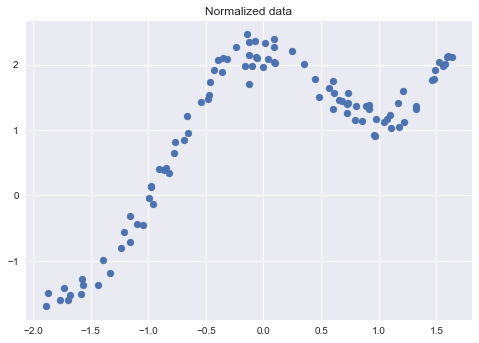

In [82]:
plt.style.use('seaborn')
plt.figure()
plt.scatter(X, y)
plt.title('Normalized data')
plt.show()

### Finding W (m x m diagonal matrix) 

In [83]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [84]:
print(type(np.mat(np.eye(5))))

<class 'numpy.matrix'>


In [85]:
# numpy matrix
# a * b => gives matrix multiplication

# numpy arrays
# a * b => gives elementwise multiplication

In [86]:
def getW(X, query_point, tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        W[i, i] = np.exp(np.dot(X[i] - query_point, (X[i] - query_point).T) / (-2 * tau * tau))
    return W

In [87]:
X = np.mat(X)
y = np.mat(y)

m = X.shape[0]
W = getW(X, -1, 1)

#### Here, if tau = 100, then W becomes an identity matrix and that means the locally weighted regression closed formula becomes equal to the linear regression formula and problem becomes a linear regression

#### If we have a large tau, then most of the points are going to contribute in finding out the theta for the problem, so use a small value of tau

#### Small bandwidth (tau) basically means a small region in the neighbouring area in the vicinity of that point is going to influence and have a more impact on the loss. The local points should have a larger impact on the tau, so we should have a small value of tau

In [88]:
W = getW(X, -1, 100)
print(W.shape)
W

(99, 99)


matrix([[0.99997933, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.99999834, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.99997917, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.99994881, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.99987121,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.99975348]])

In [89]:
W = getW(X, -1, 0.5)
print(W.shape)
W

(99, 99)


matrix([[4.37461134e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 9.35741601e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.34593282e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.29054046e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.78787793e-03, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 5.21221566e-05]])

## Make Predictions

In [109]:
def predict(X, y, query_x, tau):
    ones = np.ones((X.shape[0], 1))
    X_ = np.hstack((ones, X))
    
    qx = [1]
    qx.extend(query_x)
    W = getW(X_, qx, tau)
    theta = np.linalg.pinv((X_.T) * (W * X_)) * ((X_.T) * (W * y))
    
    pred = np.dot(qx, theta)
    return theta, pred

In [110]:
# tau = 1
predict(X, y, [1], 1)

(matrix([[1.45348191],
         [0.14069504]]),
 matrix([[1.59417694]]))

In [111]:
# tau = 0.5
predict(X, y, [1], 0.5)

(matrix([[ 1.57702978],
         [-0.11573465]]),
 matrix([[1.46129512]]))

In [112]:
# tau = 0.3
predict(X, y, [1], 0.3)

(matrix([[1.24878518],
         [0.08626985]]),
 matrix([[1.33505502]]))

In [113]:
# tau = 0.2
predict(X, y, [1], 0.2)

(matrix([[ 1.37480161],
         [-0.13187666]]),
 matrix([[1.24292496]]))

In [114]:
# tau = 0.1
predict(X, y, [1], 0.1)

(matrix([[ 1.38727728],
         [-0.22846096]]),
 matrix([[1.15881632]]))

In [115]:
# tau = 0.05
predict(X, y, [1], 0.05)

(matrix([[ 1.1336071 ],
         [-0.03731941]]),
 matrix([[1.09628769]]))

## Dot product of array and numpy array - WORKS !

In [63]:
a = [1, 2, 3]

In [64]:
b = np.array([1, 2, 3])

In [65]:
c = np.dot(a, b)

In [66]:
c

14

## Extending an array

In [67]:
a

[1, 2, 3]

In [68]:
a.extend([1])

In [99]:
a.extend(4)

TypeError: 'int' object is not iterable

In [69]:
a

[1, 2, 3, 1]

## Visualise Predictions and analyse the effect of tau

In [116]:
def plotPredictions(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    
    for qx in X_test:
        theta, pred = predict(X, y, [qx], tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(y)
    
    plt.title('Predictions tau = %.2f' % tau)
    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test, color='red')
    plt.show()

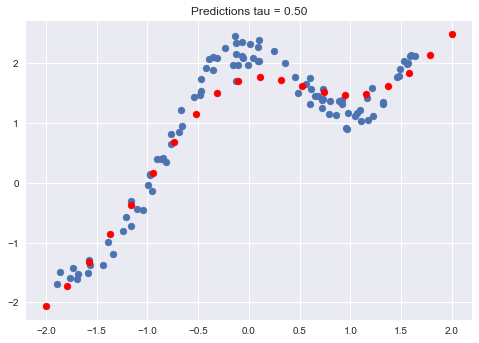

In [118]:
plotPredictions(0.5)

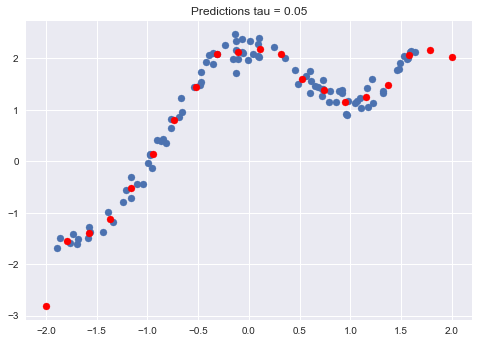

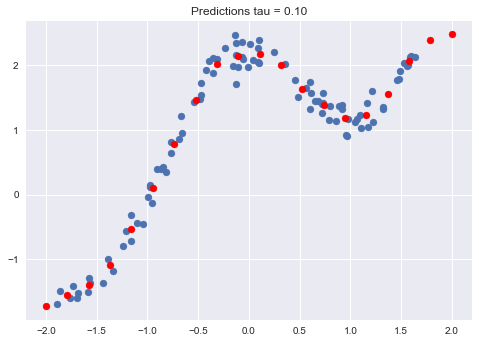

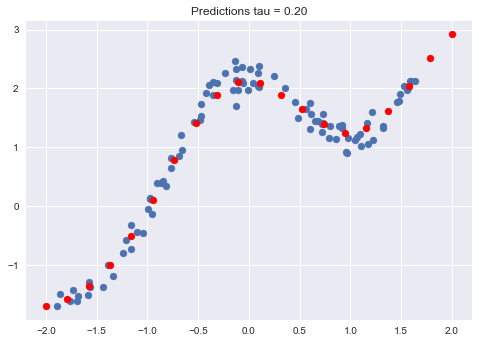

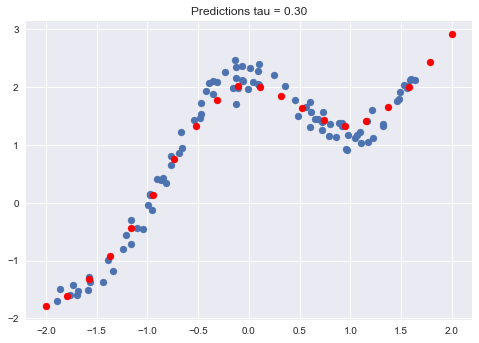

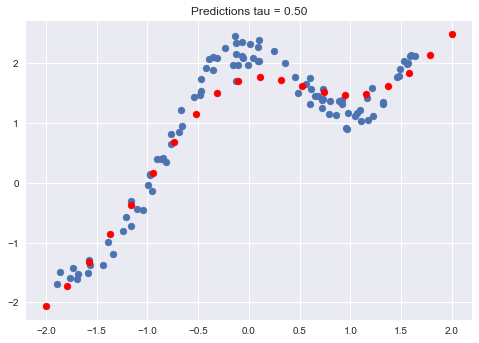

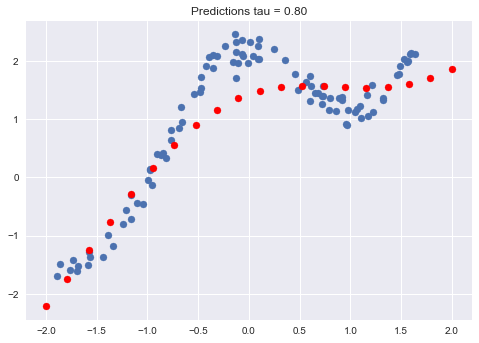

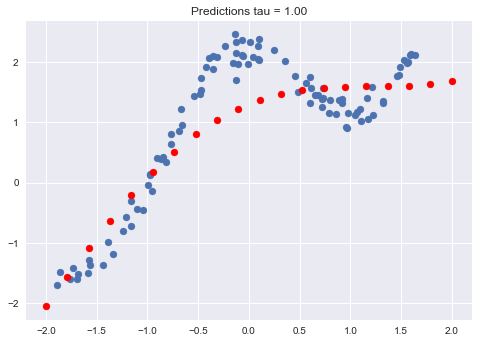

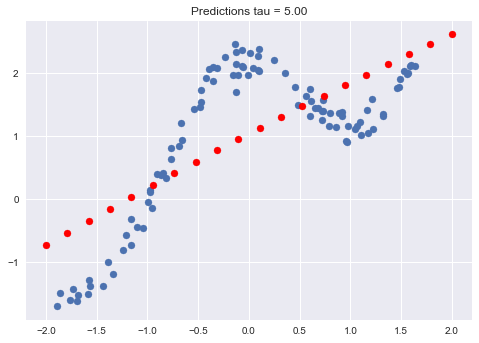

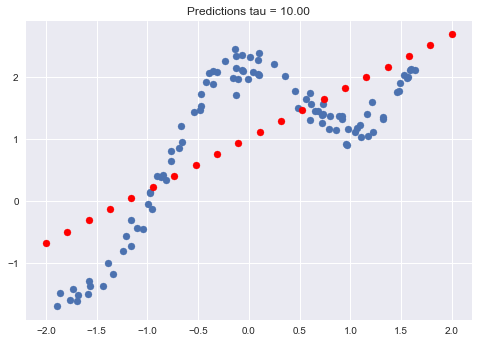

In [119]:
taus = [0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 5, 10]
for tau in taus:
    plotPredictions(tau)

## Best line at tau = 0.1

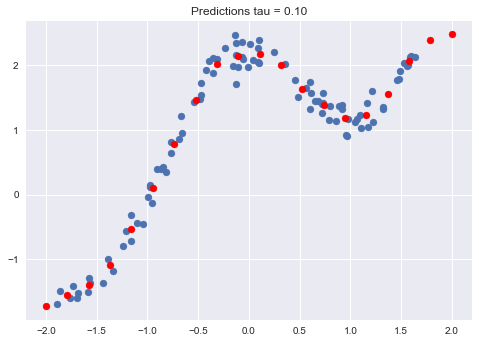

In [120]:
plotPredictions(0.1)